Algoritmo irá a probabilidade de problemas cardíacos a partir de aspectos de riscos como faixa etária, sexo e outros. A ideia é verificar a influência destes aspectos nas chances de ataque cardíaco.

In [ ]:
!pip install jupyterthemes
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install sklearn

In [17]:
# Carregando as libs necessárias para o processamento dos dados
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

In [18]:
# importando os dados
clevelanData = pd.read_csv('processed.cleveland.data',sep=';', decimal=',')
hungaryData = pd.read_csv('processed.hungarian.data',sep=';', decimal=',')
swissData = pd.read_csv('processed.switzerland.data',sep=';', decimal=',')
dataSet = pd.concat([clevelanData, hungaryData, swissData])

In [19]:
# Dispensando os campos irrelevantes para o ponto que se pretende provar
dataSet.drop(dataSet.columns[9:13], axis=1, inplace=True)

# Formatando os dados
dataSet.replace('?', 0, inplace=True)
dataSet['sex'].replace(['1.0', '1', 1],'Masculino', inplace=True)
dataSet['sex'].replace(['0.0', '0', 0],'Feminino', inplace=True)
dataSet['gender'] = dataSet['sex'].map({'Masculino': 1, 'Feminino': 0})

dataSet['restBloodPressure'].replace('.0','', inplace=True)
dataSet['restBloodPressure'] = dataSet['restBloodPressure'].astype(int)


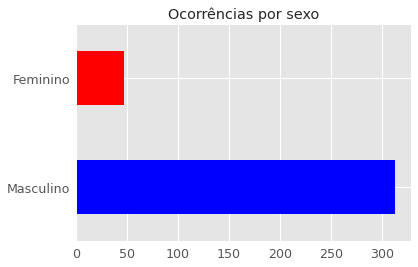

In [31]:
# iniciando as estatísticas básicas

# Número de ocorrências por sexo
ocorrenciasPorSexo = dataSet['sex'].where(dataSet['heartDisDiagnosis'] > 0).value_counts()
ocorrenciasPorSexo.plot.barh(title="Ocorrências por sexo", color=['blue', 'red'])
plt.show()

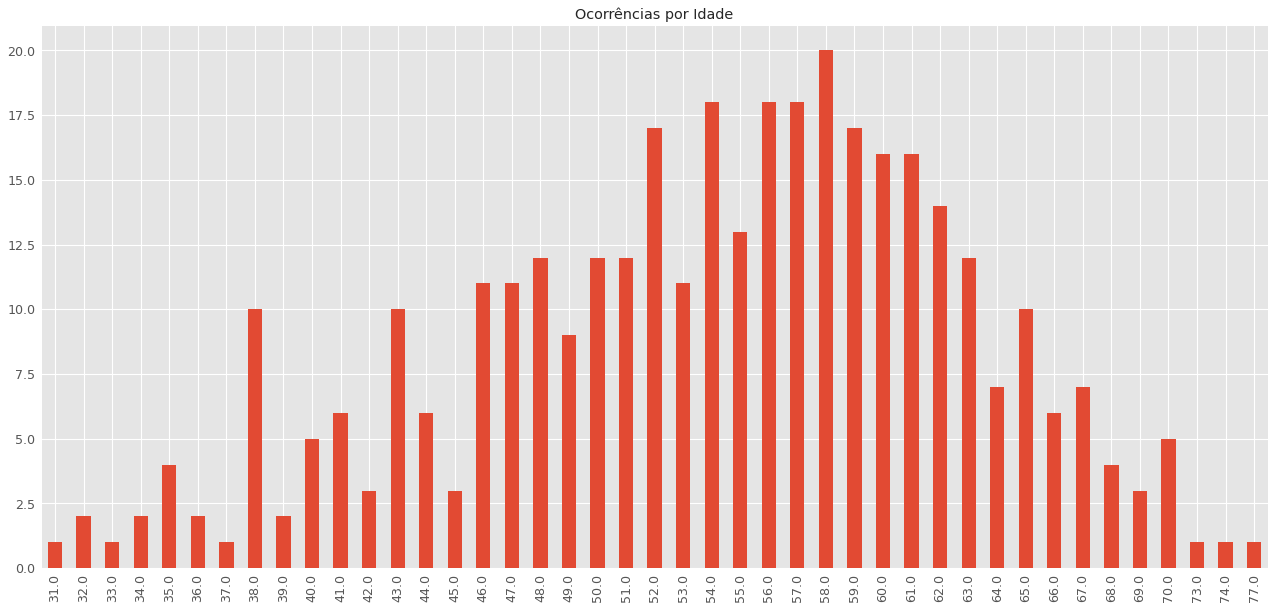

In [30]:
# Ocorrências por faixa de idade
plt.style.use("ggplot")
ocorrenciasIdade = dataSet['age'].where(dataSet['heartDisDiagnosis'] > 0).value_counts().sort_index()
ocorrenciasIdade.plot.bar(title="Ocorrências por Idade", figsize=(22,10))
plt.show()

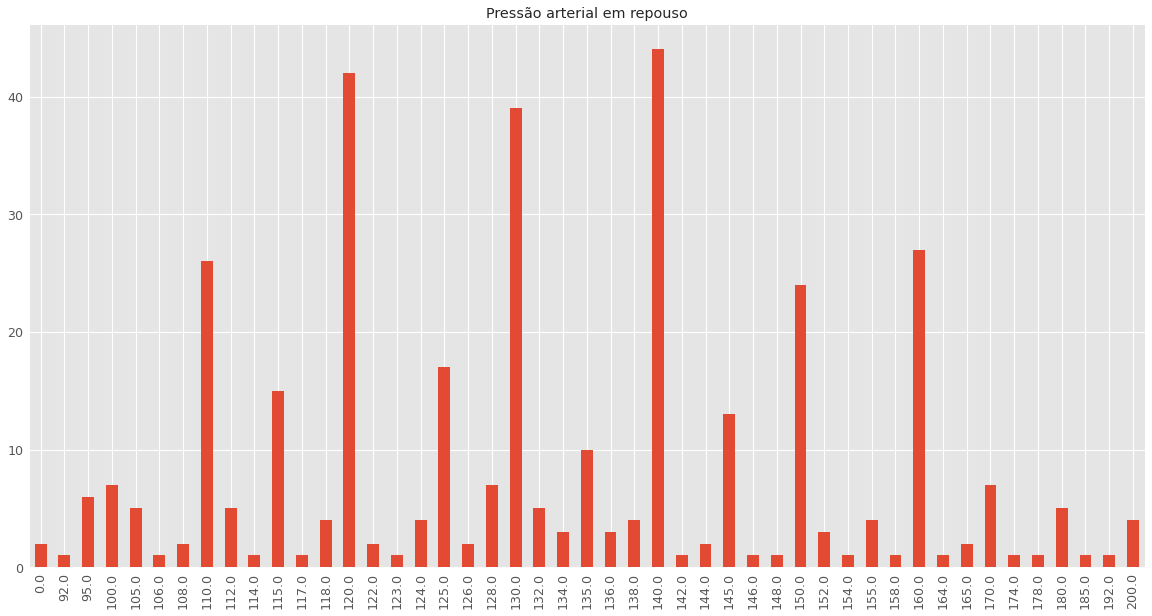

In [29]:
# Pressão arterial
sintomas = dataSet['restBloodPressure'].where(dataSet['heartDisDiagnosis'] > 0).value_counts().sort_index()
sintomas.plot.bar(title='Pressão arterial em repouso', figsize=(20,10))
plt.show()

In [23]:
feature_names = ['age', 'gender', 'restBloodPressure', 'cholestoral', 'bloodSugar']
X = dataSet[feature_names]
y = dataSet['heartDisDiagnosis'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

print('Nomes dos Atributos: ', feature_names, '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['age', 'gender', 'restBloodPressure', 'cholestoral', 'bloodSugar'] 

Tamanho de X:  (720, 5) 

Tamanho de y:  (720,) 



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

clf = LogisticRegression(n_jobs=-1, random_state=12345, max_iter=1000)

In [25]:
clf.fit(X_train, y_train)

# Coeficientes do modelo
for feature, coef in zip(feature_names, clf.coef_[0].tolist()):
    print(f"{feature}: {round(coef, 3)}")

# Constante do modelo
print(f"Constante: {round(clf.intercept_[0], 3)}")

age: 0.056
gender: 1.323
restBloodPressure: 0.008
cholestoral: -0.004
bloodSugar: -0.054
Constante: -4.304


In [26]:
# simulando um homem de 65 anos com colesterol pressão alta, colesterol muito alto e com diabetes diabetes
def logistic(x):
    return 1 / (1 + np.exp(-x))

logistic(-4.304 + (0.056 * 65) + (1.323 * 1) + (0.008 * 180) + (-0.004 * 350) + (-0.054 * 1))

0.6558828412078136

In [27]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.68

 ---------------------------

Acurácia de Teste: 0.69
